In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename, sep=";")
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    return X_new, mean, std

In [5]:
def prepare_dataset(X, Y):
    n_X, m_X = X.shape
    n_Y, m_Y = Y.shape
    
    X_new = X.values
    Y_new = Y.values

    X_new = X_new.reshape((m_X, n_X))
    Y_new = Y_new.reshape((m_Y, n_Y))
    
    return X_new, Y_new

In [6]:
def fwd_pass(X, params):
    b = params["b"]
    W = params["W"]
    
    H = np.dot(W, X) + b
    cache = (b, W, H)
    return H, cache

In [7]:
def bwd_pass(X, Y, cache):
    n, m = X.shape
    (b, W, H) = cache
    
    dZ = H - Y
    db = np.sum(dZ) / m
    dW = np.dot(X, dZ.T).reshape((1, n))
    
    grads = {"db" : db, "dW": dW, "dZ": dZ}
    return grads

In [8]:
def cost(H, Y):
    m = Y.shape[1]
    return np.sum((H-Y)**2) / (2 * m)

In [9]:
def update_params(params, grads, learning_rate):
    b = params["b"]
    W = params["W"]
    
    db = grads["db"]
    dW = grads["dW"]
    
    params["b"] = b - learning_rate * db
    params["W"] = W - learning_rate * dW
    
    return params

In [10]:
def init_params(n, m):
    b = 0
    W = np.random.randn(1, n) * 0.01
    
    
    params = {"b" : b, "W" : W}
    return params

In [11]:
def gradient_descent(X, Y, learning_rate, num_iter, print_cost = False):
    n, m = X.shape 
    params = init_params(n, m)
    costs = []
    
    for i in range(num_iter):
        H, cache = fwd_pass(X, params)
        grads = bwd_pass(X, Y, cache)
        params = update_params(params, grads, learning_rate)
        
        curr_cost = cost(H, Y)
        costs.append(curr_cost)
        
        if print_cost == True:
            print(curr_cost)
    
    print("cost function:",curr_cost)
    return params, costs

## Основний код програми

        Отримання датасетів та видрук їх параметрів.

In [12]:
data_columns = ["Frequency", "Angle", "ChordLength", "Velocity", "DisplacementThickness"]
target_column = ["Decibels"]
X_init, Y_init = load_datasets('airfoil_self_noise.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X_init.shape, Y_init.shape))

Training set: X=(1503, 5), y=(1503, 1)


        Розбиття датасету на частини.

In [13]:
X_train, X_test, Y_train, Y_test = split_datasets(X_init, Y_init, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, Y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, Y_test.shape))

Training set: X=(1202, 5), y=(1202, 1)
Test set: X=(301, 5), y=(301, 1)


        Підготування датасету.

In [14]:
X_norm, mean, std = normalize(X_train)
X, Y = prepare_dataset(X_norm, Y_train)

In [15]:
print('X: {}'.format(X.shape))
print('Y: {}'.format(Y.shape))

X: (5, 1202)
Y: (1, 1202)


        Градієнтний спуск.

In [16]:
learning_rate = 0.001
num_iters = 5000

In [22]:
thetas, costs = gradient_descent(X, Y, learning_rate, num_iters, True)
print('Thetas: {}'.format(thetas))

7834.843634322356
7786.245008871871
7768.497232424657
7752.871779756816
7737.472017679616
7722.122285323268
7706.805058858892
7691.518507037556
7676.262388472309
7661.036624145652
7645.8411517732575
7630.675910894662
7615.54084134418
7600.435883093746
7585.360976236561
7570.3160609852
7555.301077671202
7540.315966744825
7525.360668774795
7510.435124448082
7495.539274569655
7480.673060062256
7465.836421966163
7451.029301438943
7436.251639755246
7421.503378306545
7406.784458600924
7392.094822262828
7377.434411032845
7362.80316676747
7348.201031438876
7333.62794713468
7319.083856057723
7304.568700525818
7290.082422971554
7275.624965942044
7261.196272098699
7246.796284217017
7232.424945186331
7218.082198009608
7203.767985803201
7189.48225179664
7175.224939332398
7160.995991865666
7146.795352964136
7132.62296630777
7118.478775688575
7104.3627250103955
7090.274758288663
7076.214819650208
7062.182853333006
7048.178803685982
7034.202615168773
7020.254232351518
7006.333599914629
6992.4406626485

2572.479625139838
2567.407863482939
2562.3461921223106
2557.2945909832556
2552.253040031015
2547.2215192706894
2542.20000874716
2537.18848854501
2532.18693878844
2527.195339641199
2522.2136713064965
2517.24191402693
2512.280048084402
2507.328053800048
2502.385911534152
2497.4536016860707
2492.5311046941583
2487.6184010356865
2482.715471226768
2477.8222958222764
2472.9388554157745
2468.0651306394325
2463.2011021639532
2458.346750698496
2453.5020569905996
2448.667001826104
2443.841566029076
2439.025730461736
2434.219476024376
2429.422783655288
2424.635634330687
2419.858009064636
2415.0898889089713
2410.331254953226
2405.582088324556
2400.842370187665
2396.1120817447286
2391.391204235323
2386.6797189363447
2381.9776071619435
2377.284850263443
2372.6014296292688
2367.9273266848736
2363.2625228926663
2358.6069997519353
2353.9607387987744
2349.323721606014
2344.695929783145
2340.0773449762455
2335.467948867909
2330.8677231771717
2326.276649659441
2321.6947101064193
2317.1218863460376
2312.55

705.3333837217367
703.9763192509015
702.6219546669091
701.2702845983212
699.9213036843847
698.5750065750125
697.2313879307615
695.8904424228114
694.5521647329433
693.2165495535196
691.883591587462
690.5532855482301
689.225626159802
687.9006081566517
686.5782262837301
685.258475296442
683.9413499606267
682.6268450525369
681.314955358818
680.0056756764874
678.6990008129139
677.3949255857972
676.0934448231463
674.7945533632615
673.4982460547108
672.2045177563118
670.9133633371101
669.6247776763598
668.3387556635025
667.0552921981476
665.7743821900518
664.4960205590976
663.2202022352764
661.9469221586647
660.6761752794068
659.4079565576934
658.1422609637411
656.8790834777751
655.6184190900057
654.3602628006113
653.104609619717
651.8514545673755
650.6007926735466
649.3526189780791
648.1069285306891
646.8637163909411
645.62297762823
644.3847073217585
643.1489005605202
641.9155524432796
640.6846580785513
639.4562125845816
638.2302110893297
637.0066487304471
635.7855206552597
634.5668220207465

209.40738665521485
209.03696954222107
208.66728937600553
208.2983446904089
207.9301340221887
207.56265591101348
207.19590889945727
206.82989153299317
206.46460235998896
206.10003993169963
205.73620280226277
205.3730895286929
205.01069867087455
204.64902879155795
204.2880784563528
203.92784623372222
203.5683306949775
203.2095304142723
202.85144396859693
202.49406993777285
202.13740690444737
201.78145345408683
201.42620817497254
201.07166965819374
200.71783649764348
200.36470729001158
200.01228063478004
199.6605551342175
199.30952939337283
198.95920202007053
198.60957162490456
198.2606368212333
197.91239622517392
197.56484845559683
197.21799213412004
196.87182588510396
196.52634833564596
196.1815581155747
195.83745385744453
195.49403419653078
195.15129777082365
194.80924322102314
194.46786919053335
194.12717432545793
193.78715727459348
193.4478166894252
193.10915122412106
192.77115953552666
192.43384028315958
192.09719212920467
191.76121373850788
191.4259037785717
191.0912609195497
190.7

77.49410715566574
77.38613220027666
77.27837206162448
77.17082631233029
77.06349452586524
76.95637627654921
76.84947113954881
76.74277869087614
76.63629850738657
76.53003016677742
76.42397324758625
76.31812732918895
76.21249199179837
76.10706681646256
76.00185138506299
75.89684528031292
75.79204808575601
75.6874593857643
75.58307876553663
75.47890581109738
75.3749401092944
75.27118124779744
75.1676288150965
75.06428240050056
74.96114159413547
74.85820598694274
74.75547517067731
74.65294873790667
74.55062628200878
74.44850739717063
74.34659167838656
74.24487872145647
74.14336812298475
74.04205948037824
73.94095239184459
73.84004645639091
73.73934127382205
73.6388364447392
73.53853157053805
73.43842625340739
73.33852009632726
73.23881270306765
73.13930367818705
73.03999262703053
72.94087915572814
72.84196287119401
72.74324338112388
72.64472029399404
72.54639321906004
72.44826176635442
72.35032554668574
72.25258417163704
72.15503725356376
72.05768440559271
71.96052524162056
71.86355937631

39.07350471074565
39.04196774431703
39.01049352084761
38.97908191550996
38.94773280372493
38.91644606116135
38.88522156373527
38.85405918760964
38.82295880919385
38.79192030514314
38.76094355235814
38.73002842798439
38.69917480941181
38.66838257427437
38.63765160044931
38.60698176605699
38.576372949460136
38.545825029263526
38.51533788431349
38.48491139369735
38.454545436743004
38.42423989301842
38.39399464233111
38.36380956472784
38.33368454049386
38.303619450152716
38.273614174465635
38.24366859443108
38.21378259128413
38.183956046496334
38.15418884177498
38.12448085906268
38.09483198053692
38.06524208860962
38.03571106592665
38.00623879536736
37.97682516004407
37.94747004330165
37.918173328717145
37.88893490009907
37.859754641487264
37.830632437152175
37.801568171594525
37.772561729544776
37.74361299596278
37.714721856037215
37.685888195185214
37.6571118990519
37.62839285350983
37.59973094465865
37.57112605882464
37.54257808256016
37.51408690264339
37.48565240607766
37.4572744800911

28.346692057323505
28.336496140618355
28.326320508742672
28.316165121339658
28.306029938132845
28.295914918925906
28.28582002360241
28.27574521212582
28.26569044453924
28.255655680965198
28.24564088160561
28.235646006741614
28.225671016733276
28.2157158720196
28.205780533118272
28.19586496062548
28.185969115215904
28.176092957642382
28.16623644873585
28.15639954940521
28.1465822206371
28.136784423495754
28.127006119122953
28.117247268737678
28.10750783363618
28.097787775191577
28.088087054853954
28.078405634150055
28.068743474683135
28.059100538132867
28.049476786255195
28.03987218088207
28.030286683921414
28.02072025735695
28.011172863248053
28.00164446372953
27.992135021011542
27.982644497379468
27.973172855193646
27.963720056889326
27.95428606497657
27.944870842039936
27.935474350738435
27.926096553805365
27.916737414048196
27.90739689434841
27.89807495766126
27.888771567015823
27.879486685514557
27.870220276333495
27.86097230272184
27.851742728001895
27.842531515569025
27.833338628

25.092721716571273
25.088999590831264
25.085284870279832
25.081577540184316
25.077877585841367
25.074184992576882
25.07049974574594
25.066821830732795
25.063151232950755
25.059487937842146
25.05583193087828
25.052183197559323
25.048541723414356
25.04490749400119
25.041280494906392
25.037660711745215
25.034048130161498
25.03044273582769
25.026844514444726
25.023253451741954
25.019669533477174
25.016092745436463
25.012523073434235
25.00896050331305
25.00540502094372
25.001856612225097
24.998315263084127
24.99478095947575
24.99125368738284
24.987733432816135
24.984220181814273
24.980713920443606
24.977214634798216
24.973722310999868
24.970236935197928
24.966758493569333
24.963286972318514
24.95982235767733
24.956364635905047
24.952913793288257
24.949469816140837
24.946032690803925
24.942602403645793
24.939178941061847
24.935762289474575
24.93235243533346
24.928949365114953
24.92555306532238
24.922163522485956
24.9187807231627
24.91540465393634
24.91203530141732
24.908672652242714
24.90531

23.774850594975472
23.773750380705707
23.772652355317966
23.771556514457473
23.770462853778092
23.769371368942316
23.768282055621327
23.767194909494872
23.766109926251296
23.76502710158755
23.763946431209117
23.762867910830046
23.76179153617289
23.760717302968725
23.759645206957128
23.758575243886124
23.757507409512243
23.756441699600423
23.755378109924024
23.754316636264832
23.753257274413034
23.752200020167166
23.751144869334123
23.75009181772917
23.749040861175875
23.74799199550612
23.746945216560096
23.745900520186243
23.744857902241268
23.74381735859014
23.74277888510603
23.74174247767034
23.74070813217264
23.739675844510703
23.738645610590453
23.737617426325965
23.736591287639435
23.73556719046118
23.734545130729597
23.73352510439118
23.73250710740049
23.731491135720116
23.730477185320698
23.729465252180887
23.72845533228734
23.727447421634675
23.726441516225524
23.725437612070433
23.72443570518789
23.723435791604317
23.722437867354035
23.72144192847925
23.72044797103005
23.71945

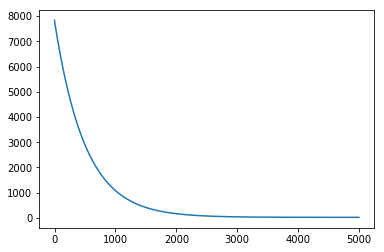

In [21]:
x = np.arange(0, len(costs), 1)
plt.plot(x, costs, 1)

plt.show()


        Тестовий датасет.

In [19]:
X_test_proc = (X_test - mean) / std
X_test_proc, Y_test_pred = prepare_dataset(X_test_proc, Y_test)
Y_test_pred, cache = fwd_pass(X_test_proc, thetas)

print("cost function:", cost(Y_test_pred, (Y_test.values).reshape(1, 301)))

Y_test_pred = Y_test_pred.reshape(301, 1)
rel_diff = np.abs(np.divide(Y_test - Y_test_pred, Y_test)) * 100
print("Mean rel_diff:", np.mean(rel_diff).values)

res = pd.DataFrame(np.column_stack([Y_test, Y_test_pred, rel_diff]), 
                   columns=['Real', 'Predicted', 'Rel Diff'])
print(res)

cost function: 25.665783060943806
Mean rel_diff: [4.78017991]
        Real   Predicted   Rel Diff
0    117.967  123.626465   4.797499
1    133.010  124.864348   6.124090
2    127.122  123.831843   2.588189
3    134.022  124.345223   7.220290
4    119.070  124.439541   4.509566
5    131.642  124.037972   5.776293
6    120.538  123.874857   2.768303
7    120.061  123.803482   3.117151
8    121.313  123.745278   2.004961
9    122.315  123.976789   1.358614
10   114.900  123.587342   7.560785
11   130.086  123.981300   4.692818
12   123.082  124.542267   1.186418
13   128.345  124.578607   2.934585
14   128.334  123.999278   3.377688
15   115.444  123.756052   7.200073
16   129.949  124.027765   4.556584
17   110.307  124.127111  12.528770
18   127.763  123.606981   3.252913
19   130.477  123.770822   5.139739
20   127.040  125.093272   1.532374
21   129.004  123.790702   4.041191
22   126.086  123.974797   1.674415
23   128.559  123.690891   3.786673
24   121.407  123.975419   2.115544
25